In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import pandas as pd
import gensim.downloader as api

In [2]:
words = pd.read_csv("transformed_data.csv")
words["Nature"] = words["Nature"].replace({"Negative": 0, "Positive": 1})
words

/tmp/ipykernel_49845/3073313590.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  words["Nature"] = words["Nature"].replace({"Negative": 0, "Positive": 1})


,Word,Nature
0,smuttier,0
1,steadiness,1
2,home,1
3,accuses,0
4,remorselessness,0
...,...,...
9411,immaculate,1
9412,malcontent,0
9413,cultured,1
9414,vibration,0


In [3]:
model = api.load("word2vec-google-news-300")

In [4]:
def apply_embeddings(word):
    if word in model.key_to_index:
        return model[word][:5]
    else:
        return None

In [5]:
words["Embeddings"] = words["Word"].apply(apply_embeddings)

In [6]:
words.dropna(inplace=True)

In [7]:
words_int = pd.DataFrame(words["Embeddings"].tolist(), index=words.index)
words_int.columns = [f'{i}' for i in range(words_int.shape[1])]
words = words.drop(columns=["Embeddings"]).join(words_int)
words

,Word,Nature,0,1,2,3,4
1,steadiness,1,0.133789,0.292969,-0.225586,0.128906,0.127930
2,home,1,-0.011841,0.079590,0.016846,-0.089844,0.086426
3,accuses,0,0.296875,0.070801,0.492188,-0.566406,0.040283
4,remorselessness,0,0.086426,0.010620,0.017578,-0.033447,-0.035645
6,disparage,0,0.021118,0.172852,0.052002,0.011169,-0.113281
...,...,...,...,...,...,...,...
9411,immaculate,1,0.056885,0.179688,0.059326,-0.103516,0.232422
9412,malcontent,0,0.271484,0.053955,0.125000,0.378906,-0.289062
9413,cultured,1,-0.097656,0.253906,0.176758,0.074707,-0.017578
9414,vibration,0,-0.205078,-0.079590,-0.114258,-0.263672,-0.239258


In [8]:
train_words = words[:7000]
test_words = words[7000:]

In [9]:
train_input = train_words.drop(columns=["Word", "Nature"]).values.tolist()
test_input = test_words.drop(columns=["Word", "Nature"]).values.tolist()

In [10]:
output = words["Nature"]
train_output = output[:7000]
test_output = output[7000:]

In [11]:
def one_hot(l):
    arr = l
    encoded_arr = np.zeros((arr.size, arr.max()+1), dtype=int)
    encoded_arr[np.arange(arr.size),arr] = 1
    return encoded_arr

In [12]:
def softmax(l):
    npl = np.array(l)
    sm = np.exp(npl - np.max(npl, axis=0, keepdims=True))
    probs = sm / np.sum(sm, axis=0, keepdims=True)
    return probs

In [13]:
one_hot_train_output = one_hot(train_output)

In [14]:
def dRelu(x):
    if x <= 0:
        return 0
    else: return 1

Epoch 0 completed
Epoch 100 completed
Epoch 200 completed
Epoch 300 completed
Epoch 400 completed
Epoch 500 completed
Epoch 600 completed
Epoch 700 completed
Epoch 800 completed
Epoch 900 completed


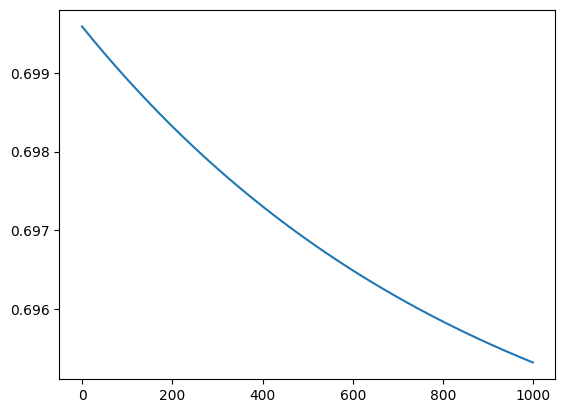

In [49]:
weights1 = [rd.random(), rd.random(), rd.random(), rd.random(), rd.random()]
weights2 = [rd.random(), rd.random(), rd.random(), rd.random(), rd.random()]
bias1 = 2
bias2 = 2
best_weights_1 = list(weights1)
best_weights_2 = list(weights2)
best_bias_1 = bias1
best_bias_2 = bias2
predicted = []
lowest_loss = 9999999
learning_rate = 0.001

all_losses = []
lowest_losses = []
relu_derivs = []

# multiplied by 0.05 to make the weights small
for i in range(1000):
    for j in train_input:
        l = [max(0, j[0]*weights1[0]+j[1]*weights1[1]+j[2]*weights1[2]+j[3]*weights1[3]+j[4]*weights1[4]+ bias1), 
            max(0, j[0]*weights2[0]+j[1]*weights2[1]+j[2]*weights2[2]+j[3]*weights2[3]+j[4]*weights2[4]+ bias2)]

        relu_derivs.append([dRelu(j[0]*weights1[0]+j[1]*weights1[1]+j[2]*weights1[2]+j[3]*weights1[3]+j[4]*weights1[4]+ bias1),
                            dRelu(j[0]*weights2[0]+j[1]*weights2[1]+j[2]*weights2[2]+j[3]*weights2[3]+j[4]*weights2[4]+ bias2)])

        predicted.append(softmax(l))

    correct_confidences = np.sum(predicted * one_hot_train_output, axis=1)
    loss = np.mean(-np.log(correct_confidences))

    gradient = np.mean(np.array(predicted) - one_hot_train_output, axis=0)
    relu = np.mean(relu_derivs, axis=0)
    
    wgradient = gradient * relu
    bgradient = gradient

    weights1[0] -= learning_rate * wgradient[0]
    weights1[1] -= learning_rate * wgradient[0]
    weights1[2] -= learning_rate * wgradient[0]
    weights1[3] -= learning_rate * wgradient[0]
    weights1[4] -= learning_rate * wgradient[0]

    weights2[0] -= learning_rate * wgradient[1]
    weights2[1] -= learning_rate * wgradient[1]
    weights2[2] -= learning_rate * wgradient[1]
    weights2[3] -= learning_rate * wgradient[1]
    weights2[4] -= learning_rate * wgradient[1]
    
    bias1 -= learning_rate * bgradient[0]
    bias2 -= learning_rate * bgradient[1]
    
    predicted = []
    relu_derivs = []
    
    all_losses.append(loss)

    if i % 100 == 0:
        print(f"Epoch {i} completed")

plt.plot(range(len(all_losses)), all_losses)

In [50]:
def predicted_output(test):
    test_predicted = []
    for i in range(len(test)):
        s1 = 0 #positive
        s2 = 0 #negative
        for j in range(5):
            s1 += max(0, test[i][j] * weights1[j])
            s2 += max(0, test[i][j] * weights2[j])
        s1 += bias1
        s2 += bias2
        sftmx = softmax([s1, s2])
        if sftmx[0]>sftmx[1]: test_predicted.append([1,0])
        else: test_predicted.append([0,1])
    return test_predicted

predicted_res = predicted_output(test_input)

one_hot_test_output = one_hot(test_output)
one_hot_test_output = one_hot_test_output.tolist()

correct_samples = 0
tp, fp, tn, fn = 0, 0, 0, 0

for i in range(len(test_output)):
    if predicted_res[i] == one_hot_test_output[i]:
        correct_samples += 1
        if predicted_res[i] == [1,0]:
            tn += 1
        else:
            tp += 1
    elif predicted_res[i] == [1, 0] and one_hot_test_output[i] == [0,1]:
        fp += 1
    elif predicted_res[i] == [0,1] and one_hot_test_output[i] == [1,0]:
        fn += 1
    else: 
        pass

accuracy = correct_samples / len(test_output)
precision = tp / (tp+fp)
recall = tp / (tp + fn)

print("Confusion matrix: ")
print('{0:2d} {1:2d}\n{2:2d} {3:2d}'.format(tp, fp, fn, tn))
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", 2 * precision * recall / (precision + recall))
print("Accuracy: ", accuracy * 100)

Confusion matrix: 
421 169
525 202
Precision:  0.7135593220338983
Recall:  0.4450317124735729
F1 Score:  0.5481770833333333
Accuracy:  47.30447987851177


In [51]:
def predict(word):
    emb = []
    if word in model.key_to_index:
        emb = model[word][:5]
    else:
        return None

    pred = predicted_output([emb])
    if pred[0] == [1,0]: print(f"{word} is a negative word")
    else: print(f"{word} is a positive word")

In [54]:
predict("happy")

happy is a positive word


In [55]:
predict("worse")

worse is a negative word
